# Ratul Chakraborty
# BDA 2nd Sem

In [2]:
import numpy as np
import pandas as pd

# Needed for plotting
import matplotlib.colors
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Needed for generating training and testing datasets
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score

np.random.seed(1234)

### Datset

In [21]:
df = pd.read_csv(r"/home/sysadm/Downloads/pm_2.5_china/GuangzhouPM20100101_20151231.csv")
df = df.drop(["No", "year", "month", "day", "hour", "season", "cbwd"], axis = 1)
df = df.dropna()
df

,PM_City Station,PM_5th Middle School,PM_US Post,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec
26304,83.0,78.0,83.0,3.7,91.0,1014.200000,5.0,1.9,0.0,0.0
26305,95.0,70.0,95.0,4.2,88.0,1014.200000,6.0,3.4,0.0,0.0
26307,55.0,66.0,55.0,3.5,76.0,1013.900000,7.5,5.8,0.0,0.0
26308,60.0,69.0,60.0,2.7,69.0,1013.900000,8.0,8.2,0.0,0.0
26309,41.0,51.0,41.0,1.5,62.0,1014.200000,8.4,9.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
52578,52.0,50.0,52.0,10.1,68.0,1017.700012,16.0,9.5,0.0,0.0
52579,59.0,56.0,59.0,11.0,80.0,1018.299988,14.4,10.9,0.0,0.0
52580,58.0,57.0,58.0,11.4,82.0,1018.700012,14.5,12.9,0.0,0.0
52581,60.0,56.0,60.0,11.1,78.0,1019.300000,14.9,14.7,0.0,0.0


In [24]:
# lets standerdize them all
def standard(x):
    return (x - np.mean(x))/np.std(x)

sdf = df.apply(standard, axis = 1)
sdf

,PM_City Station,PM_5th Middle School,PM_US Post,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec
26304,-0.179425,-0.196358,-0.179425,-0.447987,-0.152332,2.974231,-0.443584,-0.454083,-0.460518,-0.460518
26305,-0.144353,-0.229107,-0.144353,-0.452180,-0.168084,2.971886,-0.446078,-0.454892,-0.466419,-0.466419
26307,-0.247029,-0.209942,-0.247029,-0.420660,-0.176228,2.985890,-0.407174,-0.412906,-0.432461,-0.432461
26308,-0.233102,-0.202733,-0.233102,-0.426454,-0.202733,2.985719,-0.408570,-0.407895,-0.435565,-0.435565
26309,-0.274577,-0.241014,-0.274577,-0.407149,-0.204095,2.991748,-0.383991,-0.381977,-0.412184,-0.412184
...,...,...,...,...,...,...,...,...,...,...
52578,-0.253740,-0.260459,-0.253740,-0.394502,-0.199989,2.990493,-0.374681,-0.396517,-0.428432,-0.428432
52579,-0.241878,-0.251976,-0.241878,-0.403444,-0.171193,2.987088,-0.392000,-0.403781,-0.440470,-0.440470
52580,-0.246549,-0.249915,-0.246549,-0.403398,-0.165768,2.987029,-0.392964,-0.398349,-0.441769,-0.441769
52581,-0.240240,-0.253699,-0.240240,-0.404774,-0.179675,2.987524,-0.391988,-0.392661,-0.442123,-0.442123


In [26]:
# prepare the X and y
X = sdf.iloc[:, :7].to_numpy()
y = sdf["precipitation"].to_numpy()

### Train Test Split

In [27]:
# split the dataset into train and test sets
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.1, shuffle=False)
# print train and test set shapes
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")

X_train:(18066, 7)
y_train:(18066,)


## Ordinary Least Squares

In [8]:
%matplotlib inline

In [28]:
res = sm.OLS(y_train, X_train).fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          6.644e+06
Date:                Thu, 17 Mar 2022   Prob (F-statistic):                        0.00
Time:                        13:59:15   Log-Likelihood:                          58968.
No. Observations:               18066   AIC:                                 -1.179e+05
Df Residuals:                   18060   BIC:                                 -1.179e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [30]:
print("Analytically computing the parameters:")
print(np.linalg.pinv(X_train.T@X_train)@X_train.T@y_train)

Analytically computing the parameters:
[-0.14608004 -0.13318416 -0.14608004 -2.21032789  0.37179676 -0.20221634
  1.97500818]


In [31]:
print("Parameters: ", res.params)
print("Standard errors: ", res.bse)
print("R_squared value: ", res.rsquared)
print("Regression Score:{}".format(r2_score(res.predict(X_test), y_test)))

Parameters:  [-0.14608004 -0.13318416 -0.14608004 -2.21032789  0.37179676 -0.20221634
  1.97500818]
Standard errors:  [0.00128081 0.00178307 0.00128081 0.02328586 0.00645275 0.00087788
 0.02267957]
R_squared value:  0.9995471497088411
Regression Score:0.936541554621878


## Gradient Descent

In [33]:
import numpy as np
import matplotlib.pyplot as plt

class Regressor():
    def __init__(self, learning_rate=0.01, tol=0.01, seed=None,normalize=False):
        self.W = None
        self.b = None
        self.__lr = learning_rate
        self.__tol = tol
        self.__length = None
        self.__normalize = normalize
        self.__m = None
        self.__costs = []
        self.__iterations = []
        self.__ws = []
        self.__bs = []
        np.random.seed(seed if seed is not None else np.random.randint(100))

    def __initialize_weights_and_bias(self):
        self.W = np.random.randn(self.__length) #(n,1)
        self.b = 0
        self.__ws.append(self.W)
        self.__bs.append(self.b)

    def __computeCost(self,h,Y):
        loss = np.square(h-Y)
        cost = np.sum(loss)/(2*self.__m)
        return cost

    def __optimize(self,X,Y):
        h = np.dot(X,self.W)+self.b
        dW = np.dot( X.T, (h-Y) ) / self.__m
        db = np.sum( h-Y )  / self.__m
        self.W = self.W - self.__lr*dW
        self.b = self.b - self.__lr*db

    def __normalizeX(self,X):return (X-self.__mean) / (self.__std)

    def fit(self, X, y, verbose=True):
        if self.__normalize:
            self.__mean, self.__std = X.mean(axis=0), X.std(axis=0)
            X = self.__normalizeX(X)
        self.__m,self.__length = X.shape
        self.__initialize_weights_and_bias()
        last_cost,i = float('inf'),0
        while True:
            h = np.dot(X,self.W)+self.b
            cost = self.__computeCost(h,y)
            if verbose: print(f"Iteration: {i}, Cost: {cost:.3f}")
            self.__optimize(X,y)
            if last_cost-cost < self.__tol: break
            else: last_cost,i = cost,i+1
            self.__costs.append(cost)
            self.__iterations.append(i)

    def predict(self,X):

        if self.__normalize: X = self.__normalizeX(X)
        return np.dot(X,self.W)+self.b
    
    def seq_fit(self, X, y, verbose=True):
        if self.__normalize:
            self.__mean, self.__std = X.mean(axis=0), X.std(axis=0)
            X = self.__normalizeX(X)
        self.__m,self.__length = X.shape
        self.__initialize_weights_and_bias()
        last_cost,j = float('inf'),0
        while True:
            cost=0
            for i in range(len(X)):
                h = np.dot(X[i],self.W)+self.b
                cost += self.__computeCost(h,y[i])
                self.__optimize(X[i],y[i])

            if verbose: print(f"Iteration: {j}, Cost: {cost:.3f}")
            if last_cost-cost < self.__tol: break
            else: last_cost,j = cost,j+1
            self.__costs.append(cost)
            self.__iterations.append(j)     

    def plot(self,figsize=(7,5)):
        plt.figure(figsize=figsize)
        plt.plot(self.__iterations,self.__costs)
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title("Iterations vs Cost")
        plt.show()

    def score(self,X,y):
        return 1-(np.sum(((y-self.predict(X))**2))/np.sum((y-np.mean(y))**2))

### Batch Gradient Descent

X_train:(18066, 7)
y_train:(18066,)
Iteration: 0, Cost: 8.435
Iteration: 1, Cost: 6.770
Iteration: 2, Cost: 5.433
Iteration: 3, Cost: 4.361
Iteration: 4, Cost: 3.500
Iteration: 5, Cost: 2.810
Iteration: 6, Cost: 2.256
Iteration: 7, Cost: 1.812
Iteration: 8, Cost: 1.455
Iteration: 9, Cost: 1.169
Iteration: 10, Cost: 0.939
Iteration: 11, Cost: 0.755
Iteration: 12, Cost: 0.607
Iteration: 13, Cost: 0.489
Iteration: 14, Cost: 0.394
Iteration: 15, Cost: 0.317
Iteration: 16, Cost: 0.256
Iteration: 17, Cost: 0.207
Iteration: 18, Cost: 0.168
Iteration: 19, Cost: 0.136
Iteration: 20, Cost: 0.111
Iteration: 21, Cost: 0.090
Iteration: 22, Cost: 0.074
Iteration: 23, Cost: 0.061
Iteration: 24, Cost: 0.050
Iteration: 25, Cost: 0.042
Train Score: -2.158476722336021
Test Score:  -4.914979001922278


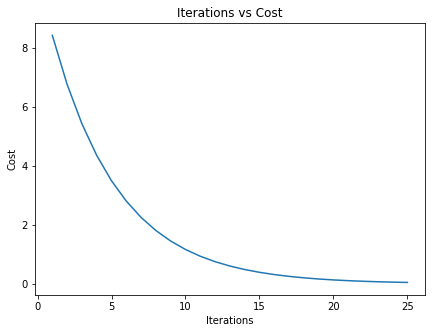

In [34]:
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")

batch_regressor = Regressor(normalize=False)
batch_regressor.fit(X_train,y_train)

train_score = r2_score(batch_regressor.predict(X_train),y_train)
test_score = r2_score(batch_regressor.predict(X_test),y_test)

print("Train Score:", train_score)
print("Test Score: ",test_score)
batch_regressor.plot()

### Sequential Gradient Descent

X_train:(18066, 7)
y_train:(18066,)
Iteration: 0, Cost: 10.868
Iteration: 1, Cost: 8.825
Iteration: 2, Cost: 7.165
Iteration: 3, Cost: 5.818
Iteration: 4, Cost: 4.725
Iteration: 5, Cost: 3.837
Iteration: 6, Cost: 3.116
Iteration: 7, Cost: 2.531
Iteration: 8, Cost: 2.056
Iteration: 9, Cost: 1.671
Iteration: 10, Cost: 1.358
Iteration: 11, Cost: 1.104
Iteration: 12, Cost: 0.897
Iteration: 13, Cost: 0.730
Iteration: 14, Cost: 0.594
Iteration: 15, Cost: 0.483
Iteration: 16, Cost: 0.394
Iteration: 17, Cost: 0.321
Iteration: 18, Cost: 0.262
Iteration: 19, Cost: 0.214
Iteration: 20, Cost: 0.175
Iteration: 21, Cost: 0.143
Iteration: 22, Cost: 0.118
Iteration: 23, Cost: 0.097
Iteration: 24, Cost: 0.080
Iteration: 25, Cost: 0.066
Iteration: 26, Cost: 0.055
Iteration: 27, Cost: 0.046
Train Score: -9.122222817056874
Test Score:  -14.423768796698592


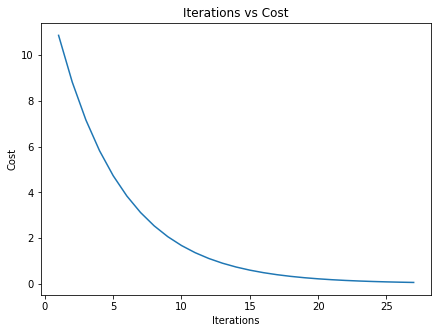

In [35]:
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")

seq_regressor = Regressor(normalize=False)
seq_regressor.seq_fit(X_train,y_train)

train_score = r2_score(seq_regressor.predict(X_train),y_train)
test_score = r2_score(seq_regressor.predict(X_test),y_test)

print("Train Score:", train_score)
print("Test Score: ",test_score)
seq_regressor.plot()

In [ ]:
# Fin -----